In [2]:
# timestamp, comodo, tipo_sensor, id_sensor, valor_sensor
import pandas as pd
from datetime import datetime

In [ ]:
df = pd.read_csv('dados_casa_inteligente.csv', sep=',')

In [4]:
display(df.head(50))

,0,1,2,3,4
0,timestamp,room,temperature,presence,luminosity
1,2025-03-01 00:00:00,Sala,28.1,0,15.0
2,2025-03-01 00:00:00,Quarto,23.3,1,40.0
3,2025-03-01 00:00:00,Cozinha,28.1,0,14.0
4,2025-03-01 00:01:00,Sala,28.0,0,20.0
5,2025-03-01 00:01:00,Quarto,23.4,1,23.0
6,2025-03-01 00:01:00,Cozinha,28.0,0,17.0
7,2025-03-01 00:02:00,Sala,28.0,0,14.0
8,2025-03-01 00:02:00,Quarto,23.1,1,10.0
9,2025-03-01 00:02:00,Cozinha,28.0,0,10.0


In [5]:
# Analisando os dados para verificar anomalias pontuais
# Criando boxplot para temperatura por cômodo
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='room', y='temperature', data=df)
plt.title('Distribuição de Temperatura por Cômodo')
plt.xlabel('Cômodo')
plt.ylabel('Temperatura (°C)')
plt.show()


ValueError: Could not interpret value `room` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

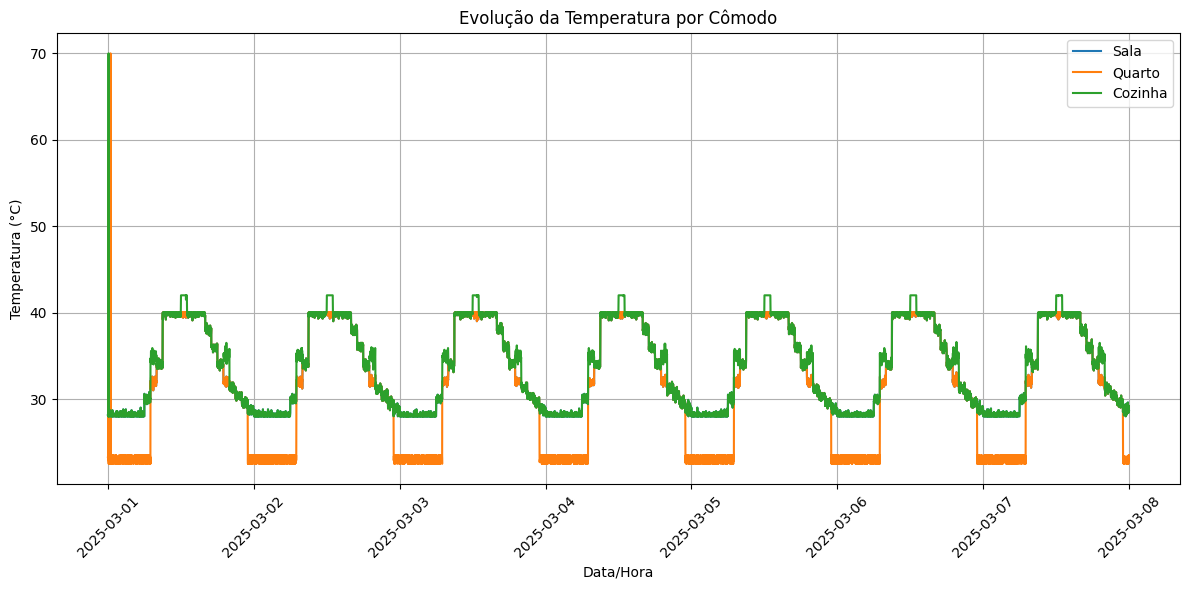

In [ ]:
# Criando gráfico de linha para temperatura ao longo do tempo por cômodo
plt.figure(figsize=(12,6))
for comodo in df['room'].unique():
    dados_comodo = df[df['room']==comodo]
    plt.plot(dados_comodo['timestamp'], dados_comodo['temperature'], label=comodo)

plt.title('Evolução da Temperatura por Cômodo')
plt.xlabel('Data/Hora') 
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


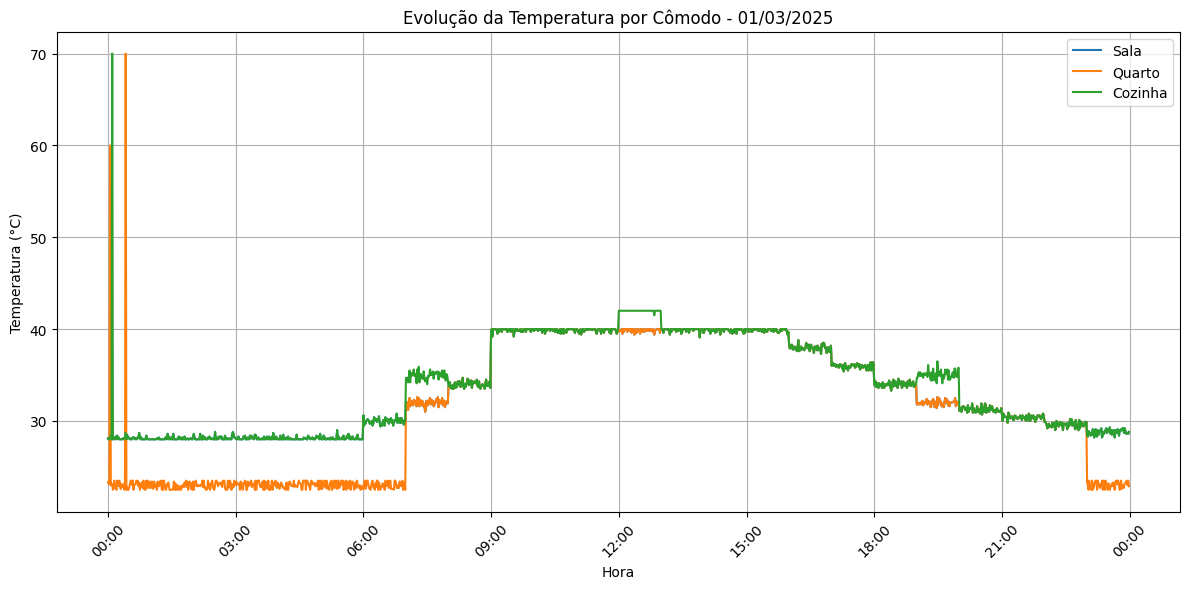

In [ ]:
# Filtrando dados para 01 de março de 2025
data_inicio = datetime(2025,3,1)
data_fim = datetime(2025,3,2)
df_dia = df[(df['timestamp'] >= data_inicio) & (df['timestamp'] < data_fim)]

# Criando gráfico de linha para temperatura ao longo do tempo por cômodo
plt.figure(figsize=(12,6))
for comodo in df_dia['room'].unique():
    dados_comodo = df_dia[df_dia['room']==comodo]
    plt.plot(dados_comodo['timestamp'], dados_comodo['temperature'], label=comodo)

plt.title('Evolução da Temperatura por Cômodo - 01/03/2025')
plt.xlabel('Hora')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Formatando o eixo x para mostrar apenas as horas
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# Criando gráfico de linha para luminosidade ao longo do tempo por cômodo
plt.figure(figsize=(12,6))
for comodo in df['room'].unique():
    dados_comodo = df[df['room']==comodo]
    plt.plot(dados_comodo['timestamp'], dados_comodo['luminosity'], label=comodo)

plt.title('Evolução da Luminosidade por Cômodo')
plt.xlabel('Data/Hora')
plt.ylabel('Luminosidade (lux)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Criando gráfico de linha para presença ao longo do tempo por cômodo 
plt.figure(figsize=(12,6))
for comodo in df['room'].unique():
    dados_comodo = df[df['room']==comodo]
    plt.plot(dados_comodo['timestamp'], dados_comodo['presence'], label=comodo)

plt.title('Evolução da Presença por Cômodo')
plt.xlabel('Data/Hora')
plt.ylabel('Presença (0/1)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'room'

<Figure size 1200x600 with 0 Axes>

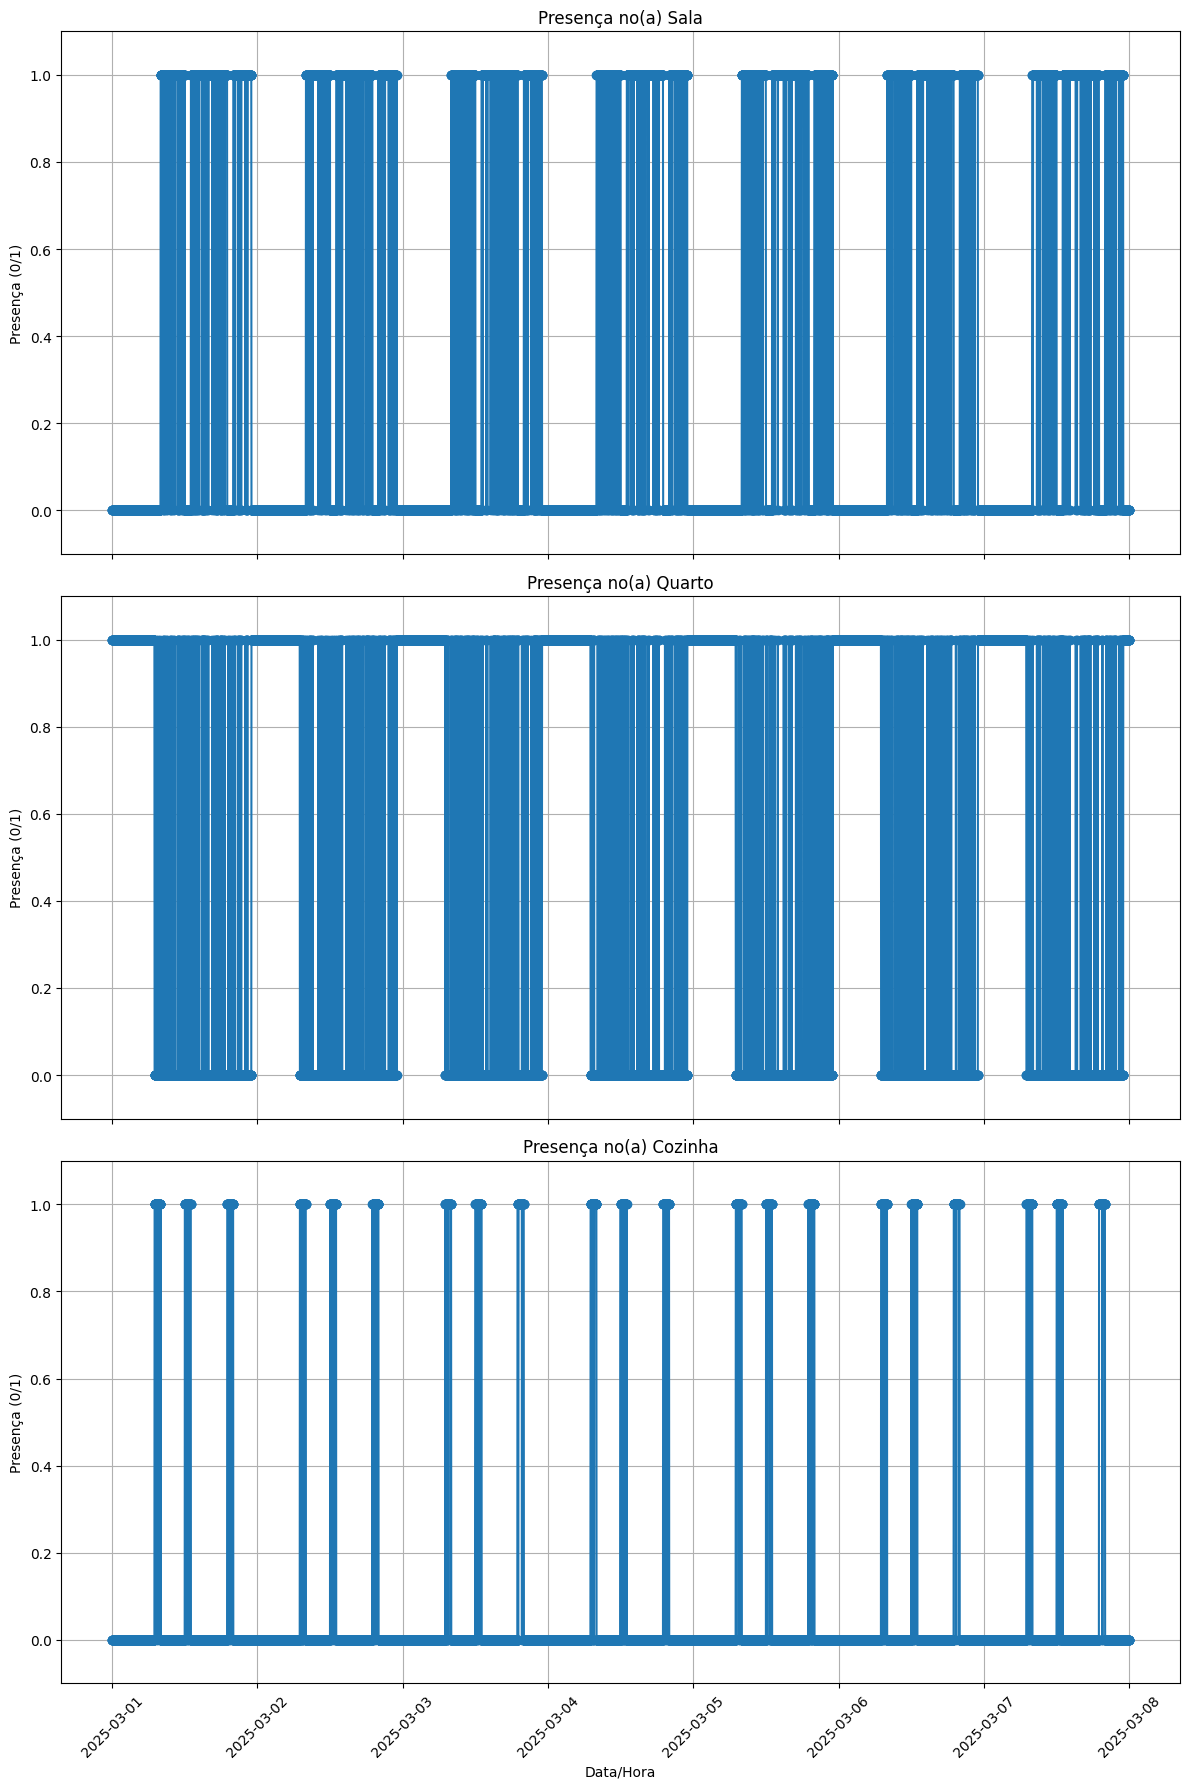

In [ ]:
# Criando gráfico de presença ao longo do tempo por cômodo. Um gráfico separado por comodo.
fig, axs = plt.subplots(len(df['room'].unique()), 1, figsize=(12, 6*len(df['room'].unique())), sharex=True)

for i, comodo in enumerate(df['room'].unique()):
    dados_comodo = df[df['room'] == comodo]
    axs[i].plot(dados_comodo['timestamp'], dados_comodo['presence'], marker='o', linestyle='-')
    axs[i].set_title(f'Presença no(a) {comodo}')
    axs[i].set_ylabel('Presença (0/1)')
    axs[i].grid(True)
    axs[i].set_ylim(-0.1, 1.1)  # Ajustando limites para melhor visualização
    
plt.xlabel('Data/Hora')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [7]:
# Detecção de anomalias coletivas usando Isolation Forest

# Importando bibliotecas necessárias
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Preparando os dados para detecção de anomalias
# Vamos usar apenas as colunas numéricas para o modelo
X = df[['temperature', 'luminosity', 'presence']].copy()

# Criando e treinando o modelo Isolation Forest
modelo_if = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Estimativa da proporção de anomalias nos dados
    random_state=42
)

# Ajustando o modelo aos dados
modelo_if.fit(X)

# Predizendo anomalias: 1 para normal, -1 para anomalia
df['anomalia'] = modelo_if.predict(X)

# Convertendo para um formato mais intuitivo: 0 para normal, 1 para anomalia
df['anomalia'] = np.where(df['anomalia'] == -1, 1, 0)

# Visualizando a distribuição de anomalias por cômodo
plt.figure(figsize=(12, 6))
for comodo in df['room'].unique():
    dados_comodo = df[df['room'] == comodo]
    plt.scatter(
        dados_comodo['timestamp'], 
        dados_comodo['temperature'], 
        c=dados_comodo['anomalia'], 
        cmap='coolwarm',
        label=comodo,
        alpha=0.7,
        s=50
    )

plt.title('Detecção de Anomalias por Temperatura e Cômodo')
plt.xlabel('Data/Hora')
plt.ylabel('Temperatura (°C)')
plt.colorbar(label='Anomalia (1) / Normal (0)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualizando anomalias em múltiplas dimensões
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Temperatura
for comodo in df['room'].unique():
    dados_comodo = df[df['room'] == comodo]
    normais = dados_comodo[dados_comodo['anomalia'] == 0]
    anomalias = dados_comodo[dados_comodo['anomalia'] == 1]
    
    axs[0].scatter(normais['timestamp'], normais['temperature'], label=f'{comodo} (normal)', alpha=0.6)
    axs[0].scatter(anomalias['timestamp'], anomalias['temperature'], marker='x', s=100, 
                  label=f'{comodo} (anomalia)', alpha=0.8)

axs[0].set_title('Anomalias na Temperatura')
axs[0].set_ylabel('Temperatura (°C)')
axs[0].grid(True)
axs[0].legend()

# Luminosidade
for comodo in df['room'].unique():
    dados_comodo = df[df['room'] == comodo]
    normais = dados_comodo[dados_comodo['anomalia'] == 0]
    anomalias = dados_comodo[dados_comodo['anomalia'] == 1]
    
    axs[1].scatter(normais['timestamp'], normais['luminosity'], label=f'{comodo} (normal)', alpha=0.6)
    axs[1].scatter(anomalias['timestamp'], anomalias['luminosity'], marker='x', s=100, 
                  label=f'{comodo} (anomalia)', alpha=0.8)

axs[1].set_title('Anomalias na Luminosidade')
axs[1].set_ylabel('Luminosidade (lux)')
axs[1].grid(True)
axs[1].legend()

# Presença
for comodo in df['room'].unique():
    dados_comodo = df[df['room'] == comodo]
    normais = dados_comodo[dados_comodo['anomalia'] == 0]
    anomalias = dados_comodo[dados_comodo['anomalia'] == 1]
    
    axs[2].scatter(normais['timestamp'], normais['presence'], label=f'{comodo} (normal)', alpha=0.6)
    axs[2].scatter(anomalias['timestamp'], anomalias['presence'], marker='x', s=100, 
                  label=f'{comodo} (anomalia)', alpha=0.8)

axs[2].set_title('Anomalias na Presença')
axs[2].set_ylabel('Presença (0/1)')
axs[2].set_ylim(-0.1, 1.1)
axs[2].grid(True)
axs[2].legend()

plt.xlabel('Data/Hora')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resumo das anomalias detectadas
print(f"Total de anomalias detectadas: {df['anomalia'].sum()} de {len(df)} registros ({df['anomalia'].mean()*100:.2f}%)")
print("\nDistribuição de anomalias por cômodo:")
for comodo in df['room'].unique():
    anomalias_comodo = df[df['room'] == comodo]['anomalia'].sum()
    total_comodo = len(df[df['room'] == comodo])
    print(f"- {comodo}: {anomalias_comodo} anomalias de {total_comodo} registros ({anomalias_comodo/total_comodo*100:.2f}%)")


KeyError: "None of [Index(['temperature', 'luminosity', 'presence'], dtype='object')] are in the [columns]"